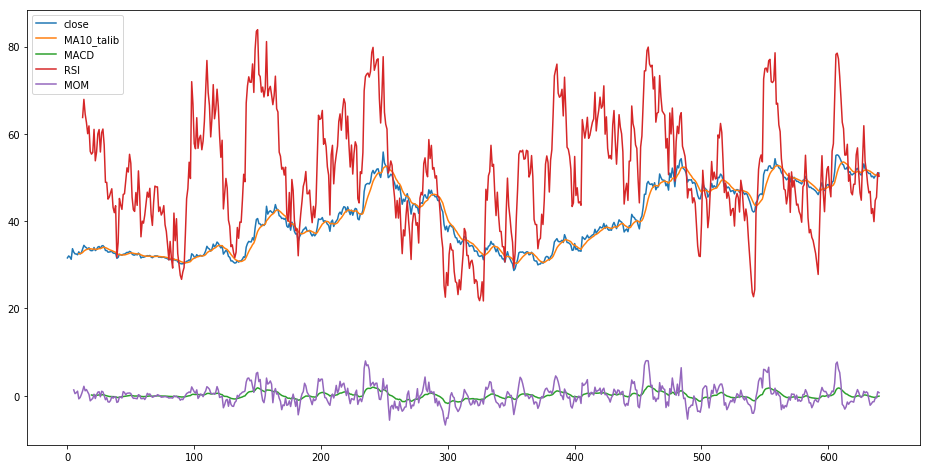

In [11]:
# Reference:
# https://github.com/sammchardy/python-binance/issues/188
# https://zhuanlan.zhihu.com/p/54299970
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

df=ts.get_k_data('600600')
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod = 10, matype = 2) 
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9)  
df['RSI']=talib.RSI(np.array(close), timeperiod=12)     #RSI的天数一般是6、12、24
df['MOM']=talib.MOM(np.array(close), timeperiod=5)
df.tail(12)
df[['close', 'MA10_talib', 'MACD', 'RSI', 'MOM']].plot(legend=True ,figsize=(16,8))